In [13]:
import pandas as pd

df = pd.read_csv('events.csv',parse_dates=['event_time'], infer_datetime_format=True).drop(['product_id','category_id', 'category_code','brand',  'user_session'], axis = 1)
df

C:\Users\Sarah\AppData\Local\Temp\ipykernel_16968\1128431664.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('events.csv',parse_dates=['event_time'], infer_datetime_format=True).drop(['product_id','category_id', 'category_code','brand',  'user_session'], axis = 1)


,event_time,event_type,price,user_id
0,2020-09-24 11:57:06+00:00,view,31.90,1515915625519388267
1,2020-09-24 11:57:26+00:00,view,17.16,1515915625519380411
2,2020-09-24 11:57:27+00:00,view,9.81,1515915625513238515
3,2020-09-24 11:57:33+00:00,view,113.81,1515915625519014356
4,2020-09-24 11:57:36+00:00,view,15.87,1515915625510743344
...,...,...,...,...
885124,2021-02-28 23:55:01+00:00,view,219.94,1515915625611023730
885125,2021-02-28 23:58:05+00:00,view,80.03,1515915625611024014
885126,2021-02-28 23:58:09+00:00,view,64.92,1515915625611024020
885127,2021-02-28 23:58:14+00:00,view,10.16,1515915625611024030


In [14]:
df.isnull().sum()
df['user_id'] = df['user_id'].astype('str')

In [16]:
df['current_month'] = df['event_time'].dt.to_period('M')
# df.groupby('current_month').size()

C:\Users\Sarah\AppData\Local\Temp\ipykernel_16968\3169422233.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['current_month'] = df['event_time'].dt.to_period('M')


In [17]:
df["cohort_month"] = df.groupby("user_id")["current_month"].transform("min")
df


,event_time,event_type,price,user_id,current_month,cohort_month
0,2020-09-24 11:57:06+00:00,view,31.90,1515915625519388267,2020-09,2020-09
1,2020-09-24 11:57:26+00:00,view,17.16,1515915625519380411,2020-09,2020-09
2,2020-09-24 11:57:27+00:00,view,9.81,1515915625513238515,2020-09,2020-09
3,2020-09-24 11:57:33+00:00,view,113.81,1515915625519014356,2020-09,2020-09
4,2020-09-24 11:57:36+00:00,view,15.87,1515915625510743344,2020-09,2020-09
...,...,...,...,...,...,...
885124,2021-02-28 23:55:01+00:00,view,219.94,1515915625611023730,2021-02,2021-02
885125,2021-02-28 23:58:05+00:00,view,80.03,1515915625611024014,2021-02,2021-02
885126,2021-02-28 23:58:09+00:00,view,64.92,1515915625611024020,2021-02,2021-02
885127,2021-02-28 23:58:14+00:00,view,10.16,1515915625611024030,2021-02,2021-02


In [18]:

from operator import attrgetter
df_cohort = df.groupby(['cohort_month', 'current_month']) \
              .agg(n_customers=('user_id', 'nunique')) \
              .reset_index(drop=False)

df_cohort['month_diff'] = (df_cohort.current_month - df_cohort.cohort_month).apply(attrgetter('n'))
df_cohort



,cohort_month,current_month,n_customers,month_diff
0,2020-09,2020-09,15334,0
1,2020-09,2020-10,955,1
2,2020-09,2020-11,267,2
3,2020-09,2020-12,119,3
4,2020-09,2021-01,98,4
5,2020-09,2021-02,72,5
6,2020-10,2020-10,83261,0
7,2020-10,2020-11,2227,1
8,2020-10,2020-12,678,2
9,2020-10,2021-01,444,3


In [19]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort_month',
                                     columns = 'month_diff',
                                     values = 'n_customers')

cohort_pivot

month_diff,0,1,2,3,4,5
cohort_month,,,,,,
2020-09,15334.0,955.0,267.0,119.0,98.0,72.0
2020-10,83261.0,2227.0,678.0,444.0,279.0,NaN
2020-11,90106.0,1867.0,792.0,552.0,NaN,NaN
2020-12,69473.0,1644.0,710.0,NaN,NaN,NaN
2021-01,78278.0,2162.0,NaN,NaN,NaN,NaN
2021-02,70831.0,NaN,NaN,NaN,NaN,NaN


In [20]:
cohort_size = cohort_pivot.iloc[:,0]
#iloc used to access and manipulate data in a tabular format.
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)*100
# performs element-wise division. performs element-wise division. axis = 0: This specifies that the division is performed along the rows
retention_matrix

month_diff,0,1,2,3,4,5
cohort_month,,,,,,
2020-09,100.0,6.227990,1.741229,0.776053,0.639103,0.469545
2020-10,100.0,2.674722,0.814307,0.533263,0.335091,NaN
2020-11,100.0,2.072004,0.878965,0.612612,NaN,NaN
2020-12,100.0,2.366387,1.021980,NaN,NaN,NaN
2021-01,100.0,2.761951,NaN,NaN,NaN,NaN
2021-02,100.0,NaN,NaN,NaN,NaN,NaN


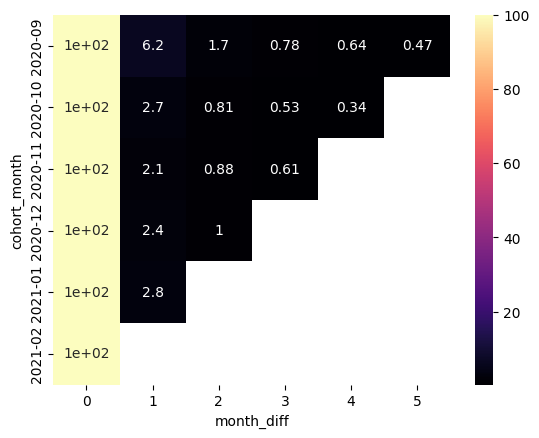

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

gragh2 =  sns.heatmap(data=retention_matrix, annot=True,cmap='magma')

In [22]:
#1.  Is there a significant difference in the prices of products that are viewed versus those that are purchased?
import scipy.stats as stats
# Filter for viewed and purchased products
viewed_products = df[df['event_type'] == 'view']
purchased_products = df[df['event_type'] == 'purchase']

# Step 2: Descriptive statistics
mean_viewed_price = viewed_products['price'].mean()
mean_purchased_price = purchased_products['price'].mean()


# Step 3: Hypothesis test (Two-sample t-test)
t_stat, p_val =stats.ttest_ind(mean_viewed_price, mean_purchased_price, equal_var=False)

# Step 4: Interpret the results
alpha = 0.05
if p_val < alpha:
    print("There is a significant difference in the prices of viewed versus purchased products.")
else:
    print("There is no significant difference in the prices of viewed versus purchased products.")


There is no significant difference in the prices of viewed versus purchased products.


c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\Sarah\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
